In [1]:
import anndata
import pandas as pd

import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition

In [2]:
primary_tumor_normal_dpd_scores =pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_scvi_svm_dpd_stvs/primary_recurrent/dpd_primay_high_normal_tumor.pkl')

In [3]:
norm_s_df=pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_scvi_svm_dpd_stvs/primary_recurrent/stv_primay_high_normal_tumor.pkl')

In [5]:
primary_tumor_normal_dpd_scores


,DPD_pnml_ptmr
index_clean,
GSM5319518_AAACCCAAGGGATCAC-1,-0.377609
GSM5319518_AAACCCAGTCGATTTG-1,-1.452295
GSM5319518_AAACCCAGTCGTCAGC-1,-1.504188
GSM5319518_AAACCCAGTTGTAAAG-1,-0.135492
GSM5319518_AAACCCATCTATCGGA-1,-0.524407
...,...
GSM5319559_TTGTGGACATGAATCC-1,-0.119897
GSM5319559_TTGTTTGGTACGGATG-1,1.515215
GSM5319559_TTGTTTGGTTTCAGAC-1,0.173547


In [6]:
df = pd.read_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_scvi_high_dim_df/dpd_scores_all_high_dim_annotated.pkl')

In [7]:
df

,DPD_tmr_nml,DPD_pmr_rct,Patients_id,Tumor_Normal_annotation,Stage
index_clean,,,,,
GSM5319548_AAACCCACAAGAGGCT-1,-2.470924,7.263390,SF2979,Tumor,Recurrent
GSM5319548_AAACGAAAGCAGTAAT-1,-2.222032,9.023294,SF2979,Tumor,Recurrent
GSM5319548_AAACGAATCGTTCCTG-1,-1.775210,5.678054,SF2979,Tumor,Recurrent
GSM5319548_AAACGCTCAAATGAGT-1,-1.424218,7.815950,SF2979,Tumor,Recurrent
GSM5319548_AAACGCTCAGCCCAGT-1,-1.078401,5.793028,SF2979,Tumor,Recurrent
...,...,...,...,...,...
GSM5319532_TTTGGTTGTGTCCTAA-1,3.836515,3.559528,SF9494,Normal,Recurrent
GSM5319532_TTTGGTTTCACACCCT-1,4.198556,3.630000,SF9494,Normal,Recurrent
GSM5319532_TTTGGTTTCATTATCC-1,3.570304,3.922781,SF9494,Normal,Recurrent


In [8]:
primary_tumor_normal_dpd_scores.reset_index(inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
primary_tumor_normal_dpd_scores_annotated=primary_tumor_normal_dpd_scores.merge(df[['index_clean','Tumor_Normal_annotation','Patients_id','Stage']],on='index_clean',how='left')

In [12]:
primary_tumor_normal_dpd_scores_annotated.set_index('index_clean',inplace=True)

In [14]:
primary_tumor_normal_dpd_scores_annotated.to_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_scvi_svm_dpd_stvs/primary_tumor_normal/primary_tumor_normal_dpd_scores_annotated.pkl')

In [15]:
primary_tumor_normal_dpd_scores_annotated

,DPD_pnml_ptmr,Tumor_Normal_annotation,Patients_id,Stage
index_clean,,,,
GSM5319518_AAACCCAAGGGATCAC-1,-0.377609,Tumor,SF2777,Primary
GSM5319518_AAACCCAGTCGATTTG-1,-1.452295,Tumor,SF2777,Primary
GSM5319518_AAACCCAGTCGTCAGC-1,-1.504188,Tumor,SF2777,Primary
GSM5319518_AAACCCAGTTGTAAAG-1,-0.135492,Tumor,SF2777,Primary
GSM5319518_AAACCCATCTATCGGA-1,-0.524407,Tumor,SF2777,Primary
...,...,...,...,...
GSM5319559_TTGTGGACATGAATCC-1,-0.119897,Normal,SF9798,Primary
GSM5319559_TTGTTTGGTACGGATG-1,1.515215,Normal,SF9798,Primary
GSM5319559_TTGTTTGGTTTCAGAC-1,0.173547,Normal,SF9798,Primary


In [16]:
import seaborn as sns

<Axes: ylabel='Frequency'>

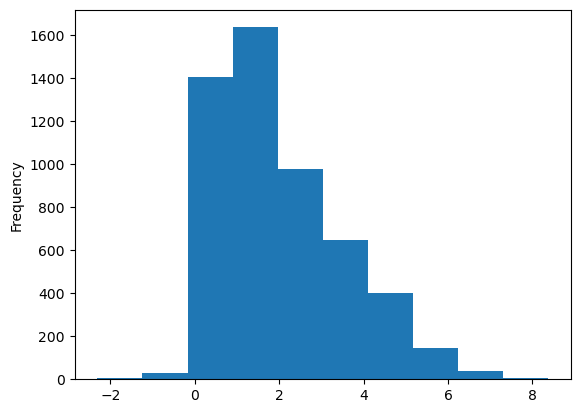

In [23]:
primary_tumor_normal_dpd_scores_annotated[primary_tumor_normal_dpd_scores_annotated['Tumor_Normal_annotation']=='Normal']['DPD_pnml_ptmr'].plot.hist()

<Axes: ylabel='Frequency'>

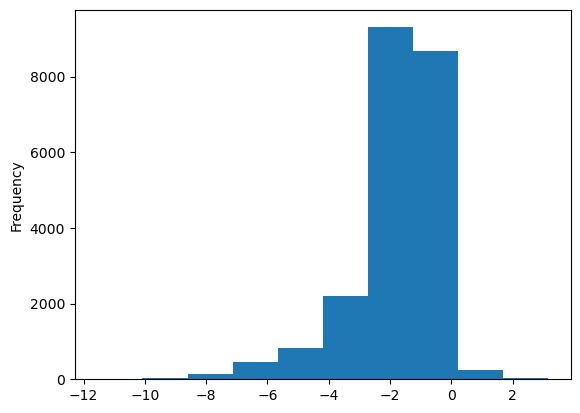

In [22]:
primary_tumor_normal_dpd_scores_annotated[primary_tumor_normal_dpd_scores_annotated['Tumor_Normal_annotation']=='Tumor']['DPD_pnml_ptmr'].plot.hist()

<Axes: ylabel='Frequency'>

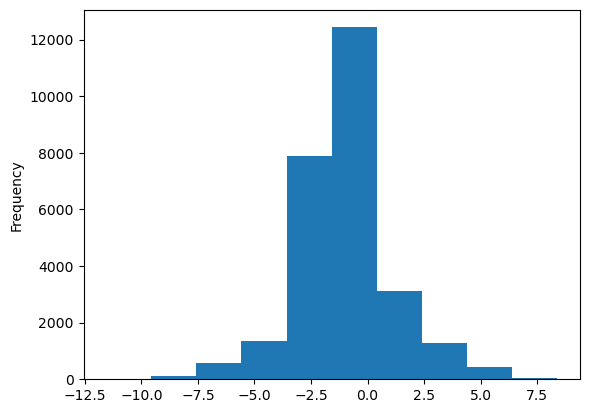

In [19]:
primary_tumor_normal_dpd_scores_annotated['DPD_pnml_ptmr'].plot.hist()

<Axes: xlabel='zeros', ylabel='DPD_pnml_ptmr'>

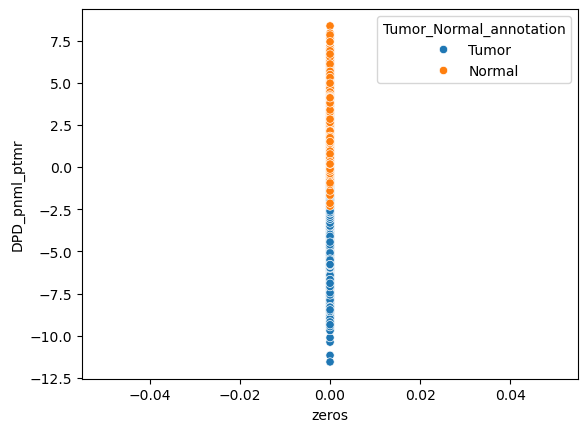

In [18]:
sns.scatterplot(x='zeros',y='DPD_pnml_ptmr',data=primary_tumor_normal_dpd_scores_annotated,hue='Tumor_Normal_annotation')